In [158]:
import pandas as pd

In [3]:
df = pd.read_csv('Customers.csv')

df.info()

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


<Axes: >

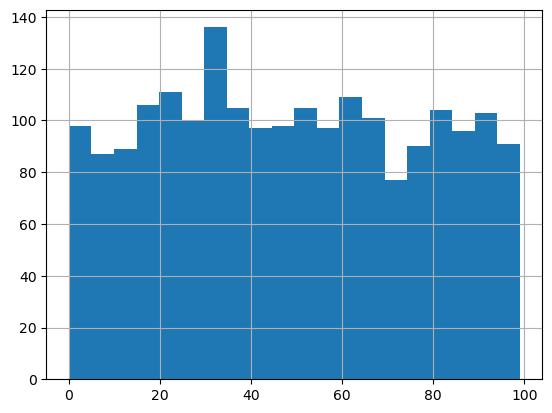

In [10]:
df['Age'].hist(bins=20)

<Axes: >

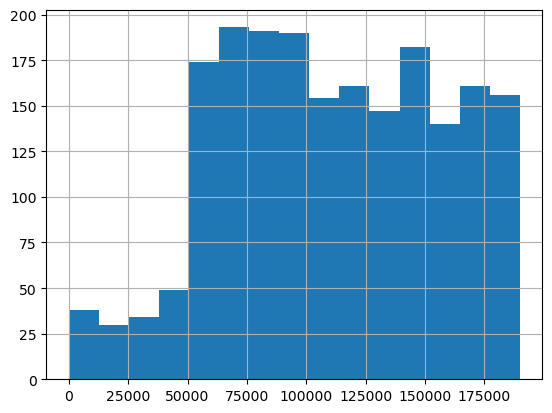

In [11]:
df['Annual Income ($)'].hist(bins=15)

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

### PII
- CustomerID

### SPII/ Senstivie
- Annual Income ($)
- Spending Score (1-100)
- Family Size

### Safe
- Gender
- Age
- Work Experince (could be SPII)

In [25]:
import re

df.columns = [re.sub(r"\(.*?\)", "", col) for col in df.columns]
df.columns = [re.sub(r"\$", "", col) for col in df.columns]
df.columns = [col.strip() for col in df.columns]

In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score',
       'Profession', 'Work Experience', 'Family Size', 'Annual Income',
       'Spending Score'],
      dtype='object')

In [32]:
df_suupressed = df.drop(columns='CustomerID')
df_suupressed.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Annual Income,Spending Score
0,Male,19,15000,39,Healthcare,1,4,15000,39
1,Male,21,35000,81,Engineer,3,3,35000,81
2,Female,20,86000,6,Engineer,1,1,86000,6
3,Female,23,59000,77,Lawyer,0,2,59000,77
4,Female,31,38000,40,Entertainment,2,6,38000,40


In [41]:
df_suupressed = df_suupressed.loc[:, ~df_suupressed.columns.duplicated()]

df_suupressed.dtypes


Gender             object
Age                 int64
Annual Income       int32
Spending Score      int32
Profession         object
Work Experience     int64
Family Size         int64
dtype: object

<Axes: >

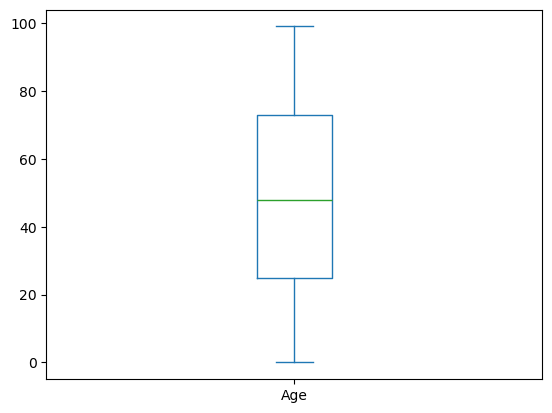

In [44]:
df_suupressed['Age'].plot(kind='box')

<Axes: >

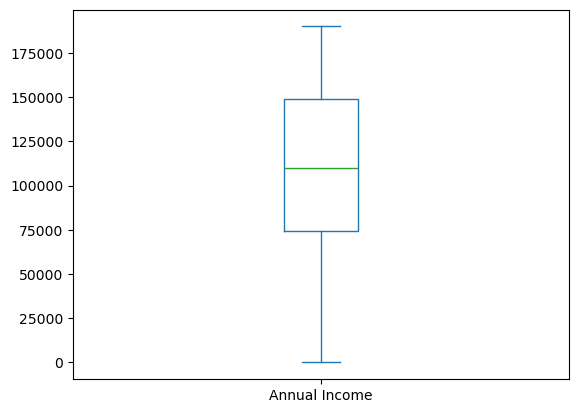

In [42]:
df_suupressed['Annual Income'].plot(kind='box')

In [54]:
df_masked = df_suupressed.copy()

df_masked['Annual Income'] = df_masked['Annual Income'].astype(str).apply(lambda x: '*' * (len(x)-2) + x[-3:])
df_masked['Annual Income'].head()

0    ***000
1    ***000
2    ***000
3    ***000
4    ***000
Name: Annual Income, dtype: object

In [55]:
!pip install faker

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 119.8 kB/s eta 0:00:17
    --------------------------------------- 0.0/1.9 MB 119.8 kB/s eta 0:00:17
    --------------------------------------- 0.0/1.9 MB 131.3 kB/s eta 0:00:15
   - -------------------------------------- 0.1/1.9 MB 179.1 kB/s eta 0:00:11
   - -------------------------------------- 0.1/1.9 MB 179.1 kB/s eta 0:00:11
   - -------------------------------------- 0.1/1.9 MB 201.8 kB/s eta 0:00:10
   -- ------------------------------------- 0.1/1.9 MB 232.7 kB/s eta 0:00:08
   -- ----------------------------------

In [58]:
from faker import Faker

fake = Faker()

df_faker = df_masked.copy()

df_faker['Email'] = [fake.email() for _ in range(len(df_faker))]
df_faker.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Email
0,Male,19,***000,39,Healthcare,1,4,gcox@example.net
1,Male,21,***000,81,Engineer,3,3,codyross@example.org
2,Female,20,***000,6,Engineer,1,1,josephsimpson@example.net
3,Female,23,***000,77,Lawyer,0,2,jamesenglish@example.net
4,Female,31,***000,40,Entertainment,2,6,maryflowers@example.com


In [59]:
df_faker['Profession'] = [fake.job() for _ in range(len(df_faker))]
df_faker['Profession'].head()

0    Civil engineer, contracting
1         Pension scheme manager
2            Associate Professor
3       Surveyor, land/geomatics
4          Glass blower/designer
Name: Profession, dtype: object

In [74]:
bins = [0, 20, 40, 60, 80, 100] 
labels = ["<=20", "20-40", "40-60", "60-80", "80+"]
df_gen = df.copy()
df_gen['Age Group'] = pd.cut(df_gen['Age'], bins=bins, labels=labels)

df_gen[['Age', 'Age Group']].head(10)

,Age,Age Group
0,19,<=20
1,21,20-40
2,20,<=20
3,23,20-40
4,31,20-40
5,22,20-40
6,35,20-40
7,23,20-40
8,64,60-80
9,30,20-40


In [75]:
df_gen['Annual Income'] = df_gen['Annual Income'].astype(int)


In [78]:
bins_income = [0, 50000, 100000, 200000]
labels_income = ["Low", "Medium", "High"]

df_gen['Income Group'] = pd.cut(df_gen['Annual Income'], bins=bins_income, labels=labels_income)

df_gen[['Annual Income', 'Income Group']] 


,Annual Income,Income Group
0,15000,Low
1,35000,Low
2,86000,Medium
3,59000,Medium
4,38000,Low
...,...,...
1995,184387,High
1996,73158,Medium
1997,90961,Medium
1998,182109,High


In [80]:
df_tbc = df.copy()

df_tbc['Age TBC'] = df_tbc['Age'].apply(lambda x: "<20" if x < 20 else ("70+" if x > 70 else x))
df_tbc[['Age', 'Age TBC']]


,Age,Age TBC
0,19,<20
1,21,21
2,20,20
3,23,23
4,31,31
...,...,...
1995,71,70+
1996,91,70+
1997,87,70+
1998,77,70+


In [85]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [89]:
profession_map = {
    'Healthcare': 'Medical',
    'Doctor': 'Medical',
    'Engineer': 'Technical',
    'Executive': 'Management',
    'Lawyer': 'Legal',
    'Artist': 'Creative',
    'Entertainment': 'Creative',
    'Marketing': 'Business',
    'Homemaker': 'Other'
}

df_categorical = df_tbc.copy()
df_categorical['Profession Group'] = df_categorical['Profession'].map(profession_map).fillna('Other')

df_categorical[['Profession', 'Profession Group']].head(10)


,Profession,Profession Group
0,Healthcare,Medical
1,Engineer,Technical
2,Engineer,Technical
3,Lawyer,Legal
4,Entertainment,Creative
5,Artist,Creative
6,Healthcare,Medical
7,Healthcare,Medical
8,Engineer,Technical
9,Artist,Creative


In [ ]:
df_categorical.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score',
       'Profession', 'Work Experience', 'Family Size', 'Age TBC',
       'Profession Group'],
      dtype='object')

In [ ]:
qi_cols = ['Age TBC', 'Gender', 'Profession Group']
k_values = df_categorical.groupby(qi_cols).size()
min_k = k_values.min()
min_k


1

In [113]:
violations = k_values[k_values < 3]
violations.index

MultiIndex([(20, 'Female',   'Business'),
            (20, 'Female',      'Legal'),
            (20, 'Female', 'Management'),
            (20, 'Female',  'Technical'),
            (20,   'Male',   'Business'),
            (20,   'Male',      'Legal'),
            (21, 'Female',   'Business'),
            (21, 'Female',   'Creative'),
            (21, 'Female', 'Management'),
            (21,   'Male',   'Business'),
            ...
            (69,   'Male',      'Other'),
            (70, 'Female',   'Business'),
            (70, 'Female',      'Legal'),
            (70, 'Female', 'Management'),
            (70, 'Female',  'Technical'),
            (70,   'Male',      'Legal'),
            (70,   'Male', 'Management'),
            (70,   'Male',    'Medical'),
            (70,   'Male',      'Other'),
            (70,   'Male',  'Technical')],
           names=['Age TBC', 'Gender', 'Profession Group'], length=283)

In [157]:
rare_groups = violations.index
df_k = df_categorical.set_index(qi_cols)
df_k = df_k[~df_k.index.isin(rare_groups)]

df_k.index

MultiIndex([('<20',   'Male',    'Medical'),
            (   31, 'Female',   'Creative'),
            (   22, 'Female',   'Creative'),
            (   35, 'Female',    'Medical'),
            (   30, 'Female',   'Creative'),
            (   35, 'Female',    'Medical'),
            (   24, 'Female',      'Legal'),
            (   37,   'Male',    'Medical'),
            (   20,   'Male',    'Medical'),
            (   52,   'Male',   'Creative'),
            ...
            (   30, 'Female',   'Creative'),
            ('70+', 'Female',   'Creative'),
            ('70+',   'Male',   'Business'),
            (   64, 'Female',   'Creative'),
            ('<20', 'Female',  'Technical'),
            ('70+', 'Female',   'Creative'),
            ('70+', 'Female',    'Medical'),
            ('70+',   'Male',    'Medical'),
            ('70+',   'Male', 'Management'),
            ('70+',   'Male',   'Creative')],
           names=['Age TBC', 'Gender', 'Profession Group'], length=1618)

In [118]:
k_values_new = df_k.groupby(qi_cols).size()

min_k_new = k_values_new.min()
print(min_k_new)


3


In [129]:
print(len(df_categorical) , "|", len(df_k))

2000 | 1618


In [136]:
df_k.reset_index()[qi_cols].tail(10)

,Age TBC,Gender,Profession Group
1608,30,Female,Creative
1609,70+,Female,Creative
1610,70+,Male,Business
1611,64,Female,Creative
1612,<20,Female,Technical
1613,70+,Female,Creative
1614,70+,Female,Medical
1615,70+,Male,Medical
1616,70+,Male,Management
1617,70+,Male,Creative


In [139]:
df_original = pd.read_csv("Customers.csv")
df = df_original.copy()

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [143]:
df['CustomerID']

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: CustomerID, Length: 2000, dtype: int64

In [142]:
import hashlib

df['Hashed_CustomerID'] = df['CustomerID'].astype(str).apply(
    lambda x: hashlib.sha256(x.encode()).hexdigest()
)

df[['CustomerID', 'Hashed_CustomerID']].head(5)


,CustomerID,Hashed_CustomerID
0,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
2,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
3,4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...
4,5,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...


In [ ]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
cipher = Fernet(key)

df['Encrypted_CustomerID'] = df['CustomerID'].astype(str).apply(
    lambda x: cipher.encrypt(x.encode())
)

df['Encrypted_CustomerID']


0       b'gAAAAABoj6en62973_iK-o_3VmRMSBuhhV3uxI3v_zcT...
1       b'gAAAAABoj6enC7YQ5k-Q3lXTvO2ddJN4NMkb9Q2Cze7w...
2       b'gAAAAABoj6enS7BTCMpAqimq-2X9Pb-z75SP1fXTuIu4...
3       b'gAAAAABoj6enbyoL39L_r3VFdVRbww-SPtqK49PtB2zM...
4       b'gAAAAABoj6en6SiCfep7fJsS4_o-KZ0EPmCFjGzvmRGS...
                              ...                        
1995    b'gAAAAABoj6enFPlcJ6XaOixKLGMdKFVHSaPZfBn_oI_w...
1996    b'gAAAAABoj6enDlYwnUQiWmGOga8yLTKWtwlVyEpAtAjH...
1997    b'gAAAAABoj6en2LyvFCQ-rat0wzfofKoxOVzqgnqvunFM...
1998    b'gAAAAABoj6end1dTliFQs0hVGWudiMSZolESv5GJlRo5...
1999    b'gAAAAABoj6envkMLBf1Wbp3X6DmNT2hUcfguvOii58__...
Name: Encrypted_CustomerID, Length: 2000, dtype: object

In [149]:
decrypted = df['Encrypted_CustomerID'].iloc[2]
cipher.decrypt(decrypted).decode()

'3'

In [150]:
import base64

df['Encoded_CustomerID'] = df['CustomerID'].astype(str).apply(
    lambda x: base64.b64encode(x.encode()).decode()
)

df['Encoded_CustomerID']

0           MQ==
1           Mg==
2           Mw==
3           NA==
4           NQ==
          ...   
1995    MTk5Ng==
1996    MTk5Nw==
1997    MTk5OA==
1998    MTk5OQ==
1999    MjAwMA==
Name: Encoded_CustomerID, Length: 2000, dtype: object

In [151]:
decoded = base64.b64decode(df['Encoded_CustomerID'].iloc[0]).decode()
decoded

'1'